In [1]:
import numpy as np
import matplotlib.pyplot as plt
from classifier.AdalineBGD import AdalineBGD
from shared import Plot, Data

In [2]:
# Get Iris data
print('Download Iris data...')
iris = Data.get_iris_data()
print(iris.tail())
print('Finished!')

Download Iris data...
       0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica
Finished!


In [3]:
# Get training Data
y = iris.iloc[0:100, 4].values  # Get species
y = np.where(y == 'Iris-setosa', -1, 1)  # Iris-setosa : -1, else : 1
X = iris.iloc[0:100, [0, 2]].values  # Get sepal length & peral length


Plot data...


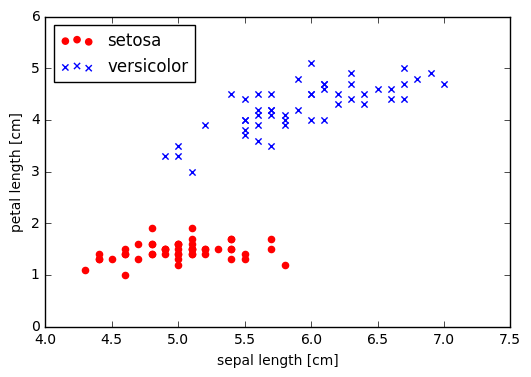

In [4]:
# Plot data
print('\nPlot data...')
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o',
            label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x',
            label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()


Plot errors of eta=0.01 and eta=0.0001...


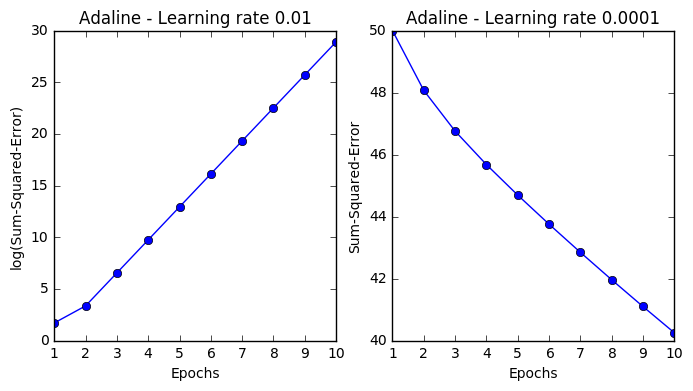

In [5]:
# Plot errors of eta=0.01 and eta=0.0001
print('\nPlot errors of eta=0.01 and eta=0.0001...')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
#  eta=0.01
ada1 = AdalineBGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-Squared-Error)')
ax[0].set_title('Adaline - Learning rate 0.01')
#  eta=0.0001
ada2 = AdalineBGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-Squared-Error')
ax[1].set_title('Adaline - Learning rate 0.0001')
#  Plot
plt.show()


Plot results of standardized features...


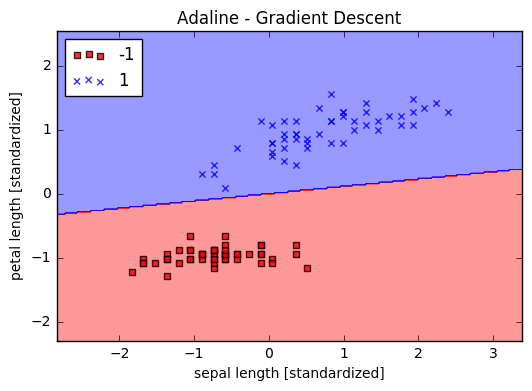


Plot errors of standardized features...


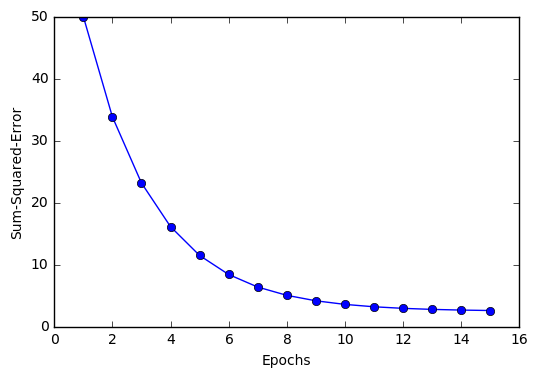

In [6]:
# Plot result and errors of standardized features
"""
Standardized, make features satisfing stand normal distribution
    (mean = 0, standard deviation = 1)

xj' = (xj - mean(xj))/(standatd_deviation(xj))
"""
#  Standardized
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
#  Plot results
print('\nPlot results of standardized features...')
ada = AdalineBGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)
Plot.plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()
#  Plot errors
print('\nPlot errors of standardized features...')
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-Squared-Error')
plt.show()